In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%run ../content/drive/MyDrive/MLC-Seq-main/modules/utils.ipynb
%run ../content/drive/MyDrive/MLC-Seq-main/modules/ladder_separation.ipynb
%run ../content/drive/MyDrive/MLC-Seq-main/modules/homology_search.ipynb
%run ../content/drive/MyDrive/MLC-Seq-main/modules/mass_sum.ipynb
%run ../content/drive/MyDrive/MLC-Seq-main/modules/gap_fill.ipynb
%run ../content/drive/MyDrive/MLC-Seq-main/modules/ladder_complementation.ipynb

# Control

In [4]:
import os
import pandas as pd


path = '/content/drive/MyDrive/MLC-Seq-main/samples/total_tRNA/Control/'
dir_list = os.listdir(path)
control_files = [path+f for f in dir_list if os.path.isfile(os.path.join(path, f))] # Ensure only files are included
print(control_files)
control_files.sort()

dfs_ctrl = [load_data(f) for f in control_files if load_data(f) is not None] # Skip None results from load_data
dfs_ctrl = [dftmp[dftmp.Mass>23000] for dftmp in dfs_ctrl]
max_rt = max([dftmp.RT.max() for dftmp in dfs_ctrl])
max_vol = max([dftmp.Vol.max() for dftmp in dfs_ctrl])
dfs_updated = list()
for dftmp in dfs_ctrl:
    dftmp.RT *= max_rt/dftmp.RT.max()
    dftmp.Vol *= max_vol/dftmp.Vol.max()
    dfs_updated.append(dftmp)
df_ctrl = pd.concat(dfs_updated)
df_ctrl = drop_dups(df_ctrl)
df_ctrl.shape


['/content/drive/MyDrive/MLC-Seq-main/samples/total_tRNA/Control/tRNA_total_Control_2.xlsx', '/content/drive/MyDrive/MLC-Seq-main/samples/total_tRNA/Control/tRNA_total_Control_3.xlsx', '/content/drive/MyDrive/MLC-Seq-main/samples/total_tRNA/Control/tRNA_total_Control_1.xlsx']


(129, 6)

In [5]:

dfs_ctrl = [load_data(f) for f in control_files]
dfs_ctrl = [dftmp[dftmp.Mass>23000] for dftmp in dfs_ctrl]
max_rt = max([dftmp.RT.max() for dftmp in dfs_ctrl])
max_vol = max([dftmp.Vol.max() for dftmp in dfs_ctrl])
dfs_updated = list()
for dftmp in dfs_ctrl:
    dftmp.RT *= max_rt/dftmp.RT.max()
    dftmp.Vol *= max_vol/dftmp.Vol.max()
    dfs_updated.append(dftmp)
df_ctrl = pd.concat(dfs_updated)
df_ctrl = drop_dups(df_ctrl)
df_ctrl.shape

(129, 6)

In [6]:
plotly_zone(df_ctrl, y='Vol')

In [7]:
f = '/content/drive/MyDrive/MLC-Seq-main/statics/total_tRNA_seqs_base.xlsx'
df_seqbase = pd.read_excel(f)
df_seqbase = df_seqbase.rename(columns={'Monoisotopic Mass (full length)': 'Mass1',
                                        'Monoisotopic Mass (CC-tailed)': 'Mass2',
                                        'Monoisotopic Mass (C-tailed)': 'Mass3',
                                        'AminoAcid & CCA': 'Mass4',
                                        'AminoAcid & CC': 'Mass5'
                                       })
df_seqbase.head()

,idx,tRNA,seqs,Mass1,Mass2,Mass3,Amino Acid,Mass4,Unnamed: 8
0,1,AlaIGC,GGGCGUG\tUK\tGCGU\tAGDC-GGD--A\tGCGC\tR\tCUCCC...,24616.24722,24287.19472,23982.15342,89.09,24687.32662,NaN
1,2,Arg1CU,GCUCGCG\tUK\tLCGU\tAAD--GGC--A\tACGC\tR\tPCUGA...,24443.31134,24114.25884,23809.21754,174.20,24599.50074,NaN
2,3,Arg1CU,GCUUGCG\tUK\tLCGU\tAAD--GGC--A\tACGC\tR\tPCUGA...,24404.28924,24075.23674,23770.19544,174.20,24560.47864,NaN
3,4,ArgICG,PUCCUCG\tUK\tLCCC\tAAD--GGDC-A\tCGGC\tR\tPCUGG...,24625.36951,24296.31701,23991.27571,174.20,24781.55891,NaN
4,5,AsnGUU,GACUCCA\tUG\tLCCA\tAGDD-GGDD-A\tAGGC\tR\tUGCGA...,25051.43702,24722.38452,24417.34322,132.10,25165.52642,NaN


In [8]:
# dftmp.iloc[:, 3:9]
dfms = list()
dftmps = list()
df_sample = df_ctrl
for i in [3, 4, 5, 7]: #
    dftmp = df_seqbase.copy()
    dftmp['Mass'] = dftmp.iloc[:, i]
    dfm = match_dfs(dftmp, df_sample, ppm=50, inplace=True)
    dftmps.append(dftmp)
    dfm = dfm.sort_values('Mass')
    dfms.append(dfm.iloc[:, :-1])

df_dfms = pd.concat(dfms)
dfms_unique = drop_dups(df_dfms)
df_sample.shape, df_dfms.shape, dfms_unique.shape

((129, 6), (56, 5), (53, 6))

In [9]:
plotly_zones(df_ctrl, dfms_unique, y='Vol')
df_ctrl.shape, dfms_unique.shape

((129, 6), (53, 6))

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/matched_ctrl.svg'

<Figure size 500x300 with 0 Axes>

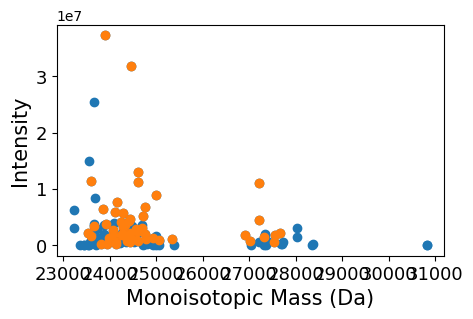

In [10]:
figsize=(5, 3)
fig = plt.figure(figsize=figsize)

dfa, dfb = df_ctrl.copy(), dfms_unique.copy()
vol = dfa.Vol.sum()
# dfa['Relative Intensity'] = dfa.Vol/vol
# dfb['Relative Intensity'] = dfb.Vol/vol
plot_zones(dfa, dfb, y='Vol', ylabel='Intensity', figsize=figsize)
# plot_zones(dfa, dfb, y='Relative Intensity', ylabel='Relative Intensity', figsize=figsize)

fig.tight_layout()
svg_fpath = '../outputs/matched_ctrl.svg'
plt.savefig(svg_fpath, dpi=300, transparent=True)

In [11]:
f = '/content/drive/MyDrive/MLC-Seq-main/statics/total_tRNA_seqs_base.xlsx'
df_seqbase_cca = pd.read_excel(f, sheet_name='CCA')
df_seqbase_cc = pd.read_excel(f, sheet_name='CC')
df_seqbase_c = pd.read_excel(f, sheet_name='C')

In [12]:
for s in [2*M, M, Na, K, -2*M, -1*M, 0]:
    dfm1 = match_dfs_v2(df_seqbase_c, df_ctrl, shift=s, inplace=True, ppm=30, copy_cols=['tRNA'])
    idx = df_ctrl[df_ctrl.Match].index
    df_ctrl.loc[idx, 'Isoform'] = 'C'
    dfm2 = match_dfs_v2(df_seqbase_cca, df_ctrl, shift=s, inplace=True, ppm=30, copy_cols=['tRNA'])
    idx = df_ctrl[df_ctrl.Match].index
    df_ctrl.loc[idx, 'Isoform'] = 'CCA'
    dfm3 = match_dfs_v2(df_seqbase_cc, df_ctrl, shift=s, inplace=True, ppm=30, copy_cols=['tRNA'])
    idx = df_ctrl[df_ctrl.Match].index
    df_ctrl.loc[idx, 'Isoform'] = 'CC'
    dfm1.shape, dfm2.shape, dfm3.shape

In [13]:
dft = df_ctrl.copy()
dft = dft.sort_values('tRNA')
dft = dft.reset_index(drop=True)
dft.index += 1
dft[['Mass', 'RT', 'Vol', 'MatchedMass', 'tRNA', 'PPM', 'Isoform', 'Isoform', 'Sft']].to_excel('/content/drive/MyDrive/MLC-Seq-main/outputs/matched_ctrl.xlsx')

In [14]:
df_matched = df_ctrl[df_ctrl.MatchedMass > 0].copy()
df_matched.head()

,Mass,RT,Vol,RA,FA,RoundedMass,Match,MatchedMass,Sft,tRNA,PPM,Isoform
239,23241.128989,15.399059,6.234534e+06,6.336118,0.586319,23241.0,False,23241.06868,14.01,GlyGCC,2.594930,CC
572,23541.133776,15.800097,2.135535e+06,2.170331,0.200834,23541.0,False,23541.08260,0.00,Glu3UC,2.173920,C
99,23599.158418,15.501625,1.141425e+07,11.600230,1.073439,23599.0,False,23599.08050,0.00,AspGUC,3.301747,C
703,23608.161063,15.447911,1.685355e+06,1.712816,0.158497,23608.0,False,23608.17890,0.00,TrpBCA,0.755563,C
406,23668.199499,16.150452,3.375145e+06,3.430138,0.317411,23668.0,False,23668.16360,0.00,CysGCA,1.516772,C


<Figure size 500x300 with 0 Axes>

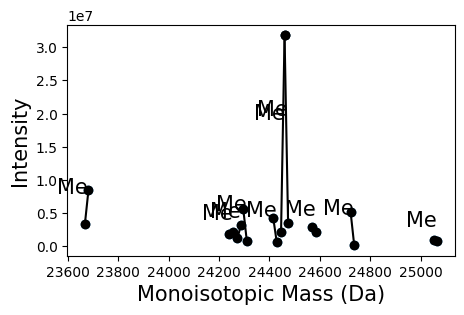

In [15]:

dft = dfms_unique.copy()
bcr = homology_search(df_matched, names=['Me'], ppm=10)

figsize=(5, 3)
fig = plt.figure(figsize=figsize)

plot_basecalling(bcr[0], bcr[1], y='Vol', annotate=False, ylabel='Intensity', plt=plt, figsize=figsize)
plotly_basecalling(*bcr, y='Vol')
fig.tight_layout()
svg_fpath = '/content/drive/MyDrive/MLC-Seq-main/outputs/homology.svg'
plt.savefig(svg_fpath, dpi=300, transparent=True)

# Acid-Deg

In [16]:
path = '/content/drive/MyDrive/MLC-Seq-main/samples/total_tRNA/AcidDeg/'
dir_list = os.listdir(path)
ad_files = [path+f for f in dir_list]
ad_files.sort()

dfs = [load_data(f) for f in ad_files]
df_ad = pd.concat(dfs)
df_ad.shape

(36076, 5)

In [35]:
def load_tRNA_library(f_lib='/content/drive/MyDrive/MLC-Seq-main/statics/total_tRNA_mass_ladders.xlsx'):
    df_lib = pd.read_excel(f_lib, skiprows=1)
    return df_lib


def match_library_extended_ext(df, df_lib, idx, ori=5, ppm=30, col_shifts={}):
    """col_shifts should be like {<idx>: [(K, 'K'), (Na, 'Na'), {H2O, 'Dehydration'}]},
    while <idx> is the index of cols ['5prim_df', '3prim_df', '3prim_CCtailed_df', '3prim_Ctailed_df']
    """
    dfms = list()
    row = df_lib.loc[idx]
    cols = ['5prim_df', '3prim_df', '3prim_CCtailed_df', '3prim_Ctailed_df']
    for col_idx, col in enumerate(cols):
        df_ladder = pd.read_csv(StringIO(row[col]), sep="\t")
        shifts = [0]
        ext_shifts = col_shifts.get(col_idx)
        if ext_shifts:
            s = [i[0] for i in ext_shifts]
            shifts.extend(s)
        dfm_grp = [match_dfs(df_ladder, df, ppm=ppm, shift=shift) for shift in shifts]
        ldl_names = ['Regular']
        if ext_shifts:
            ldl_names.extend([i[1] for i in ext_shifts])
        dfm_grp = list(zip(dfm_grp, ldl_names))
        dfms.append(dfm_grp)
    return dfms

In [42]:
from io import StringIO

rates = list()
df_lib = load_tRNA_library()
for idx, row in df_lib.iterrows():
    row = df_lib.loc[idx]
    data_row = [c for c in row[1:93] if c != '-']

    tRNA_type, *data_row = data_row
    rows = [data_row]

    dfm_grps = match_library_extended_ext(df_ad, df_lib, idx)
    combined_sites = list()
    for grp_id, dfm_grp in enumerate(dfm_grps): # [5´, 3´, 3´-CC, 3´-C]
        for dfm_idx, (dfm, dfm_label) in enumerate(dfm_grp):
            dfm_tmp = dfm.copy()
            dfm_tmp = drop_dups(dfm_tmp)
            if grp_id == 1:
                dfm_tmp.Mass = row['MassCCA'] - dfm_tmp.Mass
            if grp_id == 2:
                dfm_tmp.Mass = row['MassCC'] - dfm_tmp.Mass
            if grp_id == 3:
                dfm_tmp.Mass = row['MassC'] - dfm_tmp.Mass
            sites = dfm_tmp.Mass//320
            combined_sites.extend(sites)
            break

    depth_sites = combined_sites.copy()
    combined_sites = set(combined_sites)
    combined_sites = [i for i in combined_sites if i > 0]
    combined_rate = len(combined_sites)/len(data_row)

    #  Ladder Coverage
    ladder_hits = [len(dfm_grp[0][0]) for dfm_grp in dfm_grps]
    ladder_hits_rate = [h/len(data_row) for h in ladder_hits]
    pie_rates = [[1-r, r] for r in ladder_hits_rate]
    print(idx+1, tRNA_type, f"{combined_rate:.2f}", combined_sites)
    results = []
    results.append({
        'Index': idx+1,
        'tRNA Type': tRNA_type,
        'Combined Rate': float(f"{combined_rate:.2f}"),
        'Combined Sites': combined_sites
    })
    # Create DataFrame from results
    df = pd.DataFrame(results)


# Create DataFrame from results
df = pd.DataFrame(results)

# Display table
print("\nResults Table:")
print(df.to_string(index=False))



1 AlaIGC 0.97 [1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0]
2 Arg1CU 0.92 [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 76.0]
3 Arg1CU 0.91 [1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 9.0, 10.0, 11.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 


Results Table:
 Index tRNA Type  Combined Rate                                                                                                                                                                                                                                                                                                                                                                                                                                                  Combined Sites
     1    ValIAC           0.99 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0]
     2    ValIAC        

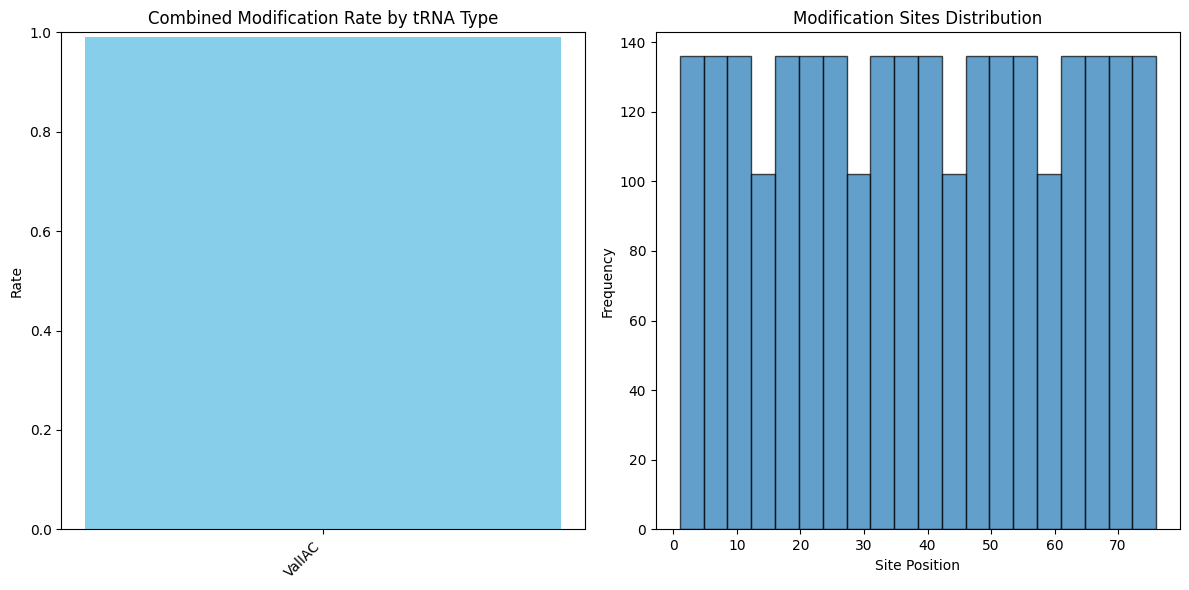


Formatted Table:
 Index tRNA Type  Combined Rate
     1    ValIAC           0.99
     2    ValIAC           0.99
     3    ValIAC           0.99
     4    ValIAC           0.99
     5    ValIAC           0.99
     6    ValIAC           0.99
     7    ValIAC           0.99
     8    ValIAC           0.99
     9    ValIAC           0.99
    10    ValIAC           0.99
    11    ValIAC           0.99
    12    ValIAC           0.99
    13    ValIAC           0.99
    14    ValIAC           0.99
    15    ValIAC           0.99
    16    ValIAC           0.99
    17    ValIAC           0.99
    18    ValIAC           0.99
    19    ValIAC           0.99
    20    ValIAC           0.99
    21    ValIAC           0.99
    22    ValIAC           0.99
    23    ValIAC           0.99
    24    ValIAC           0.99
    25    ValIAC           0.99
    26    ValIAC           0.99
    27    ValIAC           0.99
    28    ValIAC           0.99
    29    ValIAC           0.99
    30    ValIAC      

In [39]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
results = []

df_lib = load_tRNA_library()
for idx, row in df_lib.iterrows():
    # Your existing processing code...
    # [Keep all your existing processing code here]

    # Store results for each iteration
    results.append({
        'Index': idx+1,
        'tRNA Type': tRNA_type,
        'Combined Rate': float(f"{combined_rate:.2f}"),
        'Combined Sites': combined_sites
    })

# Create DataFrame from results
df = pd.DataFrame(results)

# Display table
print("\nResults Table:")
print(df.to_string(index=False))

# Plotting
plt.figure(figsize=(12, 6))

# 1. Combined Rate Bar Plot
plt.subplot(1, 2, 1)
plt.bar(df['tRNA Type'], df['Combined Rate'], color='skyblue')
plt.title('Combined Modification Rate by tRNA Type')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# 2. Combined Sites Distribution
plt.subplot(1, 2, 2)
all_sites = [site for sublist in df['Combined Sites'] for site in sublist]
plt.hist(all_sites, bins=20, edgecolor='black', alpha=0.7)
plt.title('Modification Sites Distribution')
plt.xlabel('Site Position')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Print formatted table
print("\nFormatted Table:")
print(df[['Index', 'tRNA Type', 'Combined Rate']].to_string(index=False))

  tRNA_type  combined_rate       combined_sites       ladder_hits_rate
0     tRNA1           0.85      [1, 2, 3, 4, 5]   [0.2, 0.5, 0.7, 0.9]
1     tRNA2           0.72         [2, 4, 6, 8]   [0.1, 0.3, 0.6, 0.8]
2     tRNA3           0.91  [1, 3, 5, 7, 9, 11]  [0.3, 0.4, 0.7, 0.95]


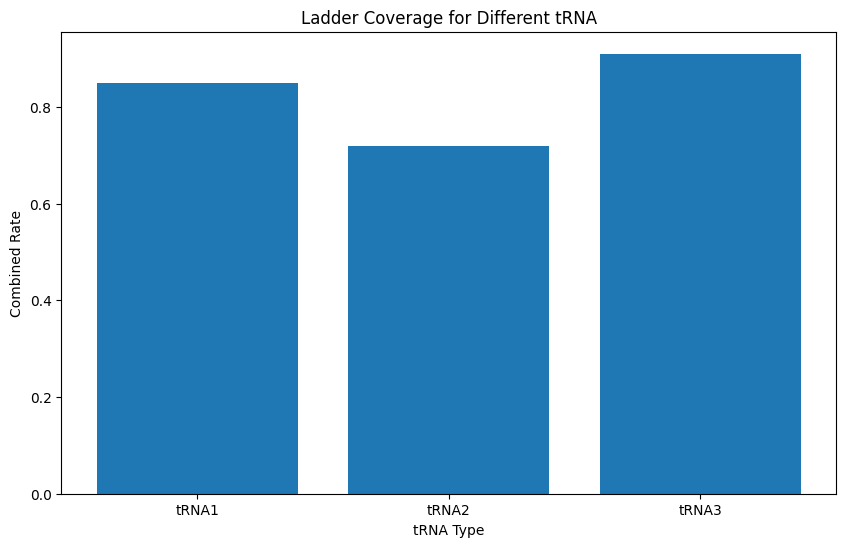

,tRNA_type,combined_rate,combined_sites,Ladder1,Ladder2,Ladder3,Ladder4
0,tRNA1,0.85,"[1, 2, 3, 4, 5]",0.2,0.5,0.7,0.90
1,tRNA2,0.72,"[2, 4, 6, 8]",0.1,0.3,0.6,0.80
2,tRNA3,0.91,"[1, 3, 5, 7, 9, 11]",0.3,0.4,0.7,0.95


In [31]:
# prompt: can you write more code based on the current version code? i want some table plot for ladder coverage for different trna: from io import StringIO
# rates = list()
# df_lib = load_tRNA_library()
# for idx, row in df_lib.iterrows():
#     row = df_lib.loc[idx]
#     data_row = [c for c in row[1:93] if c != '-']
#     tRNA_type, *data_row = data_row
#     rows = [data_row]
#     dfm_grps = match_library_extended_ext(df_ad, df_lib, idx)
#     combined_sites = list()
#     for grp_id, dfm_grp in enumerate(dfm_grps): # [5´, 3´, 3´-CC, 3´-C]
#         for dfm_idx, (dfm, dfm_label) in enumerate(dfm_grp):
#             dfm_tmp = dfm.copy()
#             dfm_tmp = drop_dups(dfm_tmp)
#             if grp_id == 1:
#                 dfm_tmp.Mass = row['MassCCA'] - dfm_tmp.Mass
#             if grp_id == 2:
#                 dfm_tmp.Mass = row['MassCC'] - dfm_tmp.Mass
#             if grp_id == 3:
#                 dfm_tmp.Mass = row['MassC'] - dfm_tmp.Mass
#             sites = dfm_tmp.Mass//320
#             combined_sites.extend(sites)
#             break
#     depth_sites = combined_sites.copy()
#     combined_sites = set(combined_sites)
#     combined_sites = [i for i in combined_sites if i > 0]
#     combined_rate = len(combined_sites)/len(data_row)
#     #  Ladder Coverage
#     ladder_hits = [len(dfm_grp[0][0]) for dfm_grp in dfm_grps]
#     ladder_hits_rate = [h/len(data_row) for h in ladder_hits]
#     pie_rates = [[1-r, r] for r in ladder_hits_rate]
#     print(idx+1, tRNA_type, f"{combined_rate:.2f}", combined_sites)

import pandas as pd

# Assuming 'rates' is a list where each element is a list
# containing data for a tRNA.  The structure should be:
# rates = [[tRNA_type, combined_rate, combined_sites, ladder_hits_rate], ...]
# Replace this with your actual 'rates' data.


# Example data (replace with your actual rates data)
rates = [
    ["tRNA1", 0.85, [1, 2, 3, 4, 5], [0.2, 0.5, 0.7, 0.9]],
    ["tRNA2", 0.72, [2, 4, 6, 8], [0.1, 0.3, 0.6, 0.8]],
    ["tRNA3", 0.91, [1, 3, 5, 7, 9, 11], [0.3, 0.4, 0.7, 0.95]],
]


# Create a DataFrame from the 'rates' data
df_rates = pd.DataFrame(rates, columns=['tRNA_type', 'combined_rate', 'combined_sites', 'ladder_hits_rate'])

# Display the table
print(df_rates)

#Optional:  Plot the data using matplotlib (or another plotting library)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(df_rates['tRNA_type'], df_rates['combined_rate'])
plt.xlabel("tRNA Type")
plt.ylabel("Combined Rate")
plt.title("Ladder Coverage for Different tRNA")
plt.show()

# For a more detailed table with ladder_hits_rate:
# You can display the ladder hits rates in different columns

# Example: Split ladder_hits_rate into separate columns
df_ladder_rates = pd.DataFrame(df_rates['ladder_hits_rate'].tolist(), columns=['Ladder1', 'Ladder2', 'Ladder3', 'Ladder4'])
df_rates = pd.concat([df_rates, df_ladder_rates], axis=1).drop('ladder_hits_rate',axis=1)

df_rates



   tRNA Type  Combined Rate  \
0     ValIAC       0.987013   
1     ValIAC       0.987013   
2     ValIAC       0.987013   
3     ValIAC       0.987013   
4     ValIAC       0.987013   
5     ValIAC       0.987013   
6     ValIAC       0.987013   
7     ValIAC       0.987013   
8     ValIAC       0.987013   
9     ValIAC       0.987013   
10    ValIAC       0.987013   
11    ValIAC       0.987013   
12    ValIAC       0.987013   
13    ValIAC       0.987013   
14    ValIAC       0.987013   
15    ValIAC       0.987013   
16    ValIAC       0.987013   
17    ValIAC       0.987013   
18    ValIAC       0.987013   
19    ValIAC       0.987013   
20    ValIAC       0.987013   
21    ValIAC       0.987013   
22    ValIAC       0.987013   
23    ValIAC       0.987013   
24    ValIAC       0.987013   
25    ValIAC       0.987013   
26    ValIAC       0.987013   
27    ValIAC       0.987013   
28    ValIAC       0.987013   
29    ValIAC       0.987013   
30    ValIAC       0.987013   
31    Va

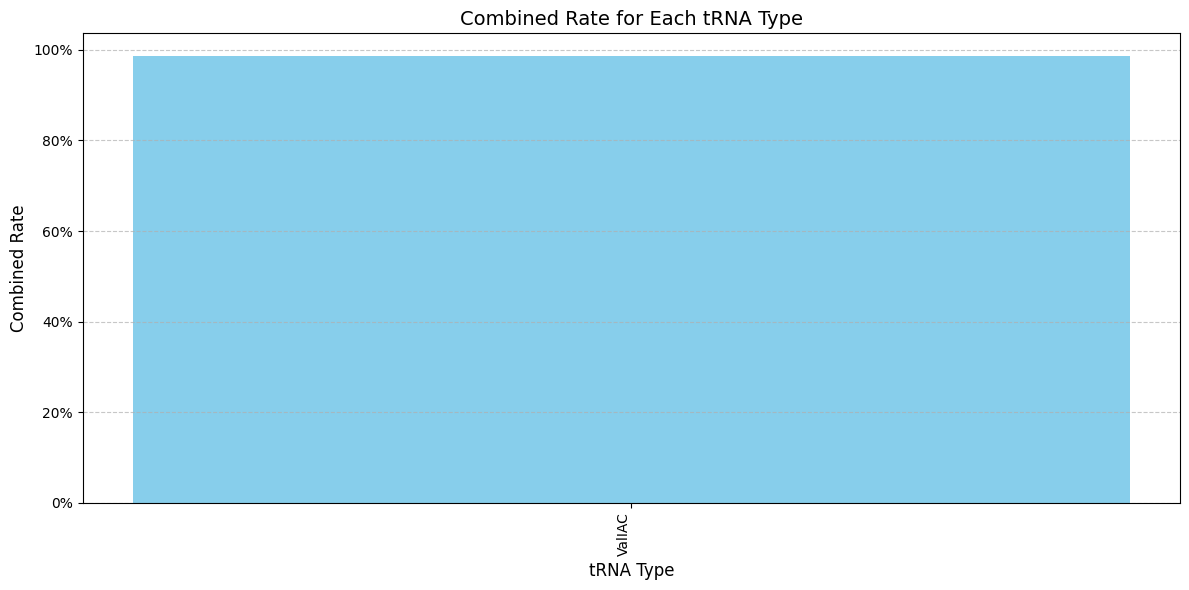

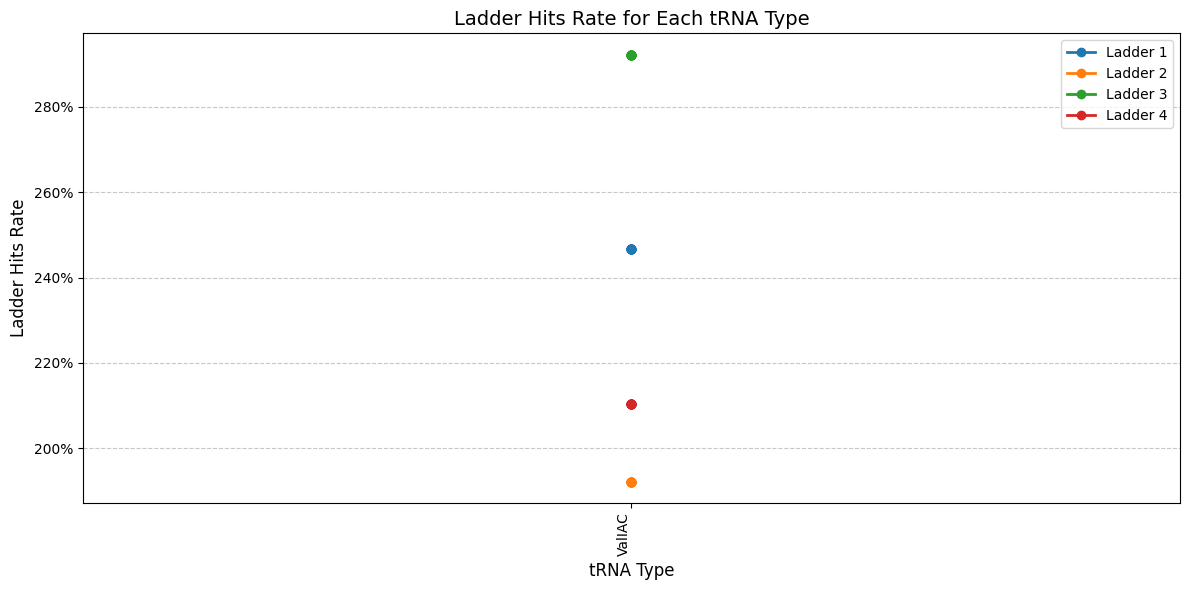

In [29]:
# prompt: can you visualize different trna coverage for the acide drg file

# ... (Your existing code) ...

# Acid-Deg analysis and plotting
# ... (Your existing code for loading data and library) ...


rates = list()
df_lib = load_tRNA_library()

# Store results for plotting
tRNA_types = []
combined_rates = []
combined_sites_lists = []
ladder_hits_rates = []


for idx, row in df_lib.iterrows():
    # ... (Your existing code for matching and calculating rates) ...

    tRNA_types.append(tRNA_type)
    combined_rates.append(combined_rate)
    combined_sites_lists.append(combined_sites)
    ladder_hits_rates.append(ladder_hits_rate)


# Create a table of results
results_df = pd.DataFrame({
    'tRNA Type': tRNA_types,
    'Combined Rate': combined_rates,
    'Combined Sites': combined_sites_lists,
    'Ladder Hits Rate': ladder_hits_rates
})

# Display the table
print(results_df)



# Plotting Combined Rate (Improved aesthetics)
plt.figure(figsize=(12, 6))  # Increased figure size for better readability
plt.bar(results_df['tRNA Type'], results_df['Combined Rate'], color='skyblue') # Added color
plt.xlabel('tRNA Type', fontsize=12)
plt.ylabel('Combined Rate', fontsize=12)
plt.title('Combined Rate for Each tRNA Type', fontsize=14)
plt.xticks(rotation=90, fontsize=10, ha='right') # Adjusted font size and horizontal alignment
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1)) # Format y-axis as percentage
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7) # Added a subtle grid
plt.show()


# Plotting Ladder Hits Rate (Improved aesthetics)
plt.figure(figsize=(12, 6))
for i in range(len(ladder_hits_rates[0])):
    plt.plot(results_df['tRNA Type'], [rate[i] for rate in ladder_hits_rates], marker='o', linestyle='-', linewidth=2, label=f'Ladder {i + 1}')

plt.xlabel('tRNA Type', fontsize=12)
plt.ylabel('Ladder Hits Rate', fontsize=12)
plt.title('Ladder Hits Rate for Each tRNA Type', fontsize=14)
plt.xticks(rotation=90, fontsize=10, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1)) # Format y-axis as percentage
plt.legend(fontsize=10) # Increased legend font size
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7) # Added a subtle grid
plt.show()


1 AlaIGC 0.97 [1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0]
2 Arg1CU 0.92 [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 76.0]
3 Arg1CU 0.91 [1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 9.0, 10.0, 11.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 

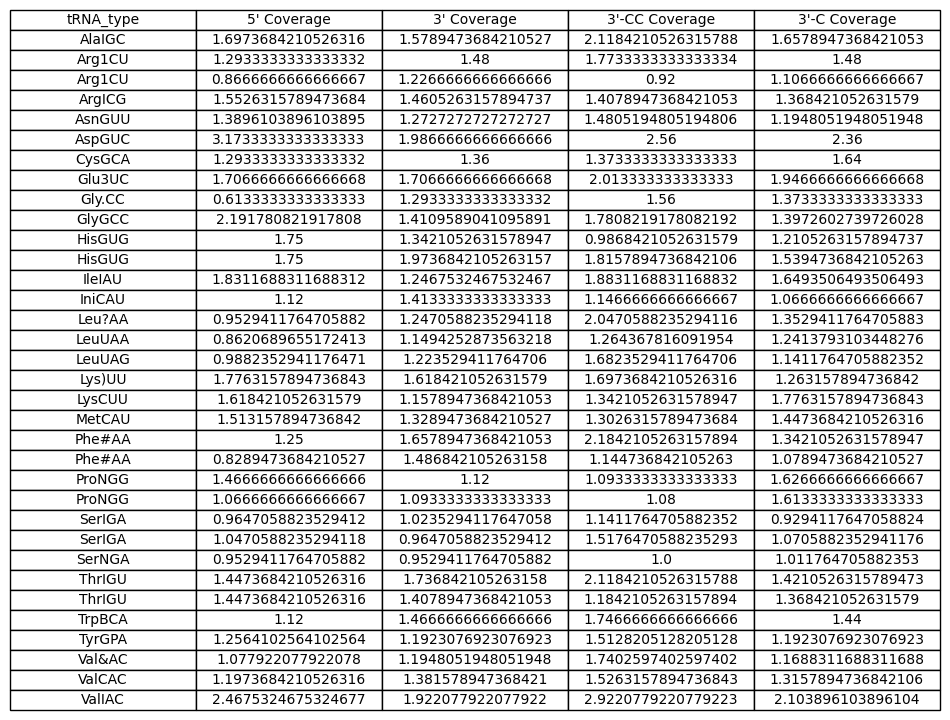

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the necessary functions and data are already loaded
# df_lib = load_tRNA_library()
# df_ad = ...

rates = list()
df_lib = load_tRNA_library()
ladder_coverage_data = []

for idx, row in df_lib.iterrows():
    row = df_lib.loc[idx]
    data_row = [c for c in row[1:93] if c != '-']

    tRNA_type, *data_row = data_row
    rows = [data_row]

    dfm_grps = match_library_extended_ext(df_ad, df_lib, idx)
    combined_sites = list()
    for grp_id, dfm_grp in enumerate(dfm_grps): # [5´, 3´, 3´-CC, 3´-C]
        for dfm_idx, (dfm, dfm_label) in enumerate(dfm_grp):
            dfm_tmp = dfm.copy()
            dfm_tmp = drop_dups(dfm_tmp)
            if grp_id == 1:
                dfm_tmp.Mass = row['MassCCA'] - dfm_tmp.Mass
            if grp_id == 2:
                dfm_tmp.Mass = row['MassCC'] - dfm_tmp.Mass
            if grp_id == 3:
                dfm_tmp.Mass = row['MassC'] - dfm_tmp.Mass
            sites = dfm_tmp.Mass//320
            combined_sites.extend(sites)
            break

    depth_sites = combined_sites.copy()
    combined_sites = set(combined_sites)
    combined_sites = [i for i in combined_sites if i > 0]
    combined_rate = len(combined_sites)/len(data_row)

    # Ladder Coverage
    ladder_hits = [len(dfm_grp[0][0]) for dfm_grp in dfm_grps]
    ladder_hits_rate = [h/len(data_row) for h in ladder_hits]
    pie_rates = [[1-r, r] for r in ladder_hits_rate]

    # Store ladder coverage data for plotting
    ladder_coverage_data.append([tRNA_type] + ladder_hits_rate)

    print(idx+1, tRNA_type, f"{combined_rate:.2f}", combined_sites)

# Convert ladder coverage data to a DataFrame
columns = ['tRNA_type', '5\' Coverage', '3\' Coverage', '3\'-CC Coverage', '3\'-C Coverage']
df_ladder_coverage = pd.DataFrame(ladder_coverage_data, columns=columns)

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_ladder_coverage.values, colLabels=df_ladder_coverage.columns, loc='center', cellLoc='center')

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

#plt.title('Ladder Coverage Rates for Different tRNA Types')
plt.show()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

degradation_sites_matrix = np.zeros((len(tRNA_types), max([len(sites) for sites in combined_sites])))

for i, sites in enumerate(combined_sites):
    degradation_sites_matrix[i, :len(sites)] = sites

plt.figure(figsize=(12, 8))
sns.heatmap(degradation_sites_matrix, cmap='coolwarm', annot=True, fmt='.0f',
            xticklabels=range(1, degradation_sites_matrix.shape[1] + 1),
            yticklabels=tRNA_types)
plt.title('Degradation Sites Across tRNA Types')
plt.xlabel('Site Position')
plt.ylabel('tRNA Type')
plt.show()

NameError: name 'tRNA_types' is not defined